In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import root_scalar

import mplhep as hep
plt.style.use(hep.style.ATLAS)

# define constants
Qtau = -1
s2w = 0.23151
T3tau = -1/2

## Define measured complex couplings from ALEPH as a function of $\phi$

In [2]:
def PhiVTauPrime(phi):
    numerator = -2 * Qtau * s2w * np.sin(phi)
    denominator = np.sqrt(T3tau**2 - 4 * Qtau * T3tau * s2w * np.cos(phi) + 4 * Qtau**2 * s2w**2)
    return np.arcsin(numerator / denominator)

# we'll also need its inverse later
def PhiVTauPrimeInverse(phi_target, bracket=[-0.2, 0.2], initial_guess=0.0, method='bisect'):
    def equation(phi):
        return PhiVTauPrime(phi) - phi_target
    sol = root_scalar(equation, bracket=bracket, method=method, x0=initial_guess)
    return sol.root if sol.converged else None

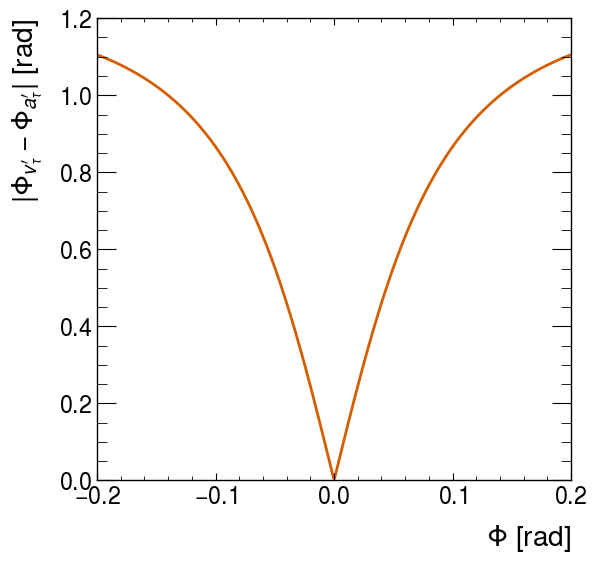

In [3]:
phiVals = np.linspace(-0.2, 0.2, 500)
phiVtauPrimeVals = np.abs(PhiVTauPrime(phiVals))

plt.figure(figsize=(6,6))
plt.plot(phiVals, phiVtauPrimeVals)
plt.xlabel(r'$\Phi$ [rad]')
plt.ylabel(r'|$\Phi_{v_{\tau}^\prime} - \Phi_{a_{\tau}^\prime}$| [rad]')
plt.ylim(0, 1.2)
plt.show()

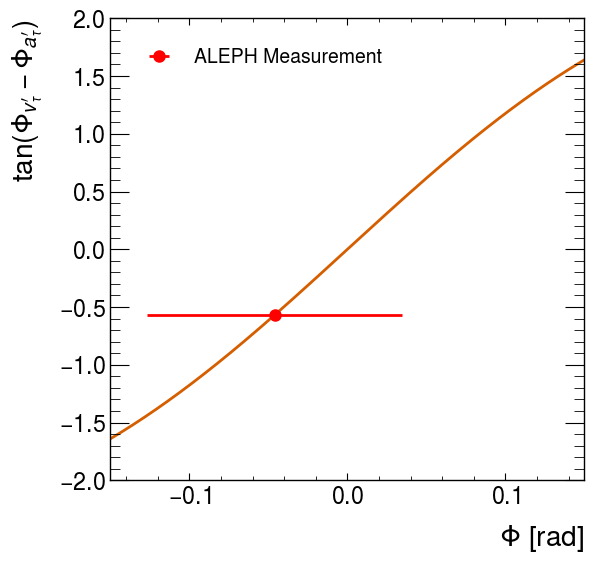

In [4]:
phiVals = np.linspace(-0.15, 0.15, 500)
tanVtauPrimeVals = np.tan(PhiVTauPrime(phiVals))

aleph_measurement = (-0.57, 0.97) # value, error

plt.figure(figsize=(6,6))
plt.plot(phiVals, tanVtauPrimeVals)
plt.errorbar(np.tan(PhiVTauPrimeInverse(np.arctan(aleph_measurement[0]))), 
             aleph_measurement[0], 
             xerr=np.tan(PhiVTauPrimeInverse(np.arctan(aleph_measurement[1]))), 
             fmt='o', color='red', label='ALEPH Measurement')
plt.xlabel(r'$\Phi$ [rad]')
plt.ylabel(r'$\tan(\Phi_{v_{\tau}^\prime} - \Phi_{a_{\tau}^\prime})$')
plt.legend()
plt.show()

## ALEPH measured value in terms of $\phi$

In [5]:
print(np.tan(PhiVTauPrimeInverse(np.arctan(aleph_measurement[0]))), 
      "+/-", 
      np.tan(PhiVTauPrimeInverse(np.arctan(aleph_measurement[1]))))

-0.046180153307990086 +/- 0.0808924749775568
